In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import torch
import torchvision.transforms as transforms
import glob
import torchvision
import time
import random
from PIL import Image
from torch.utils.data import DataLoader, Dataset

In [2]:
torch.cuda.is_available()

True

In [3]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# ตั้งค่าพาร์ทของโฟลเดอร์ที่เก็บรูปภาพ
data_dir = "train"

# สร้าง transformer สำหรับการปรับขนาดและแปลงให้เป็น Tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# โหลด dataset โดยใช้ torchvision.datasets.ImageFolder
image_dataset = torchvision.datasets.ImageFolder(data_dir, transform=transform)

# สร้าง DataLoader สำหรับการโหลดข้อมูลในรูปแบบ batch
batch_size = 32
data_loader = DataLoader(image_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# ตัวอย่างการใช้ DataLoader
for batch_idx, (images, labels) in enumerate(data_loader):
    # คุณสามารถใช้ images และ labels ในการฝึกสอนโมเดลของคุณ
    pass

In [4]:
num_images = len(image_dataset)
num_classes = len(image_dataset.classes)
print(f"Number of Images: {num_images}")
print(f"Number of Classes: {num_classes}")

Number of Images: 2316
Number of Classes: 27


In [5]:
from collections import Counter

# รับ labels จาก image_dataset
labels = [label for _, label in image_dataset.samples]

# นับความถี่ของแต่ละคลาส
label_counter = Counter(labels)

# สร้าง DataFrame แสดงจำนวนรูปภาพในแต่ละคลาส
img_per_class = pd.DataFrame(label_counter.values(), index=image_dataset.classes, columns=["No. of Images"])

img_per_class

,No. of Images
Apple Scab Leaf,77
Apple leaf,82
Apple rust leaf,79
Bell_pepper leaf,53
Bell_pepper leaf spot,62
Blueberry leaf,105
Cherry leaf,47
Corn Gray leaf spot,64
Corn leaf blight,180
Corn rust leaf,106


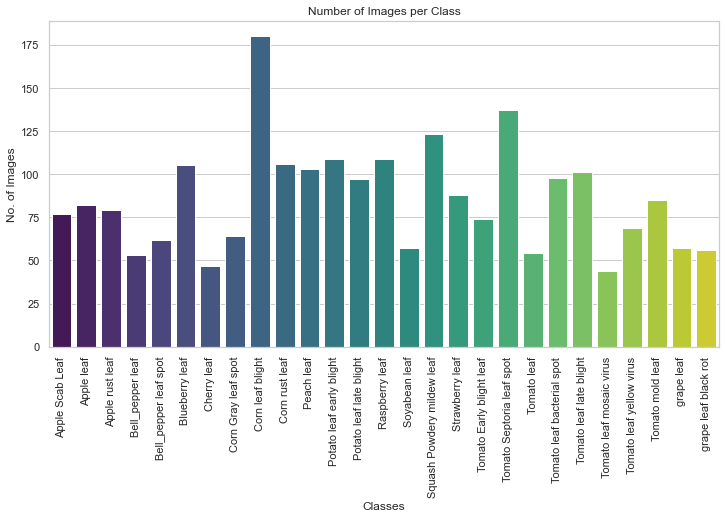

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าสไตล์ของ seaborn
sns.set(style="whitegrid")

# สร้างแผนภูมิแท่ง
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=img_per_class.index, y=img_per_class["No. of Images"], palette="viridis")

# กำหนดชื่อแกนและชื่อแผนภูมิ
plt.xlabel("Classes")
plt.ylabel("No. of Images")
plt.title("Number of Images per Class")

# หมุนแกน x ให้เป็นแนวนอน
plt.xticks(rotation=90)

# แสดงแผนภูมิ
plt.show()

In [7]:
!pip install opencv-python

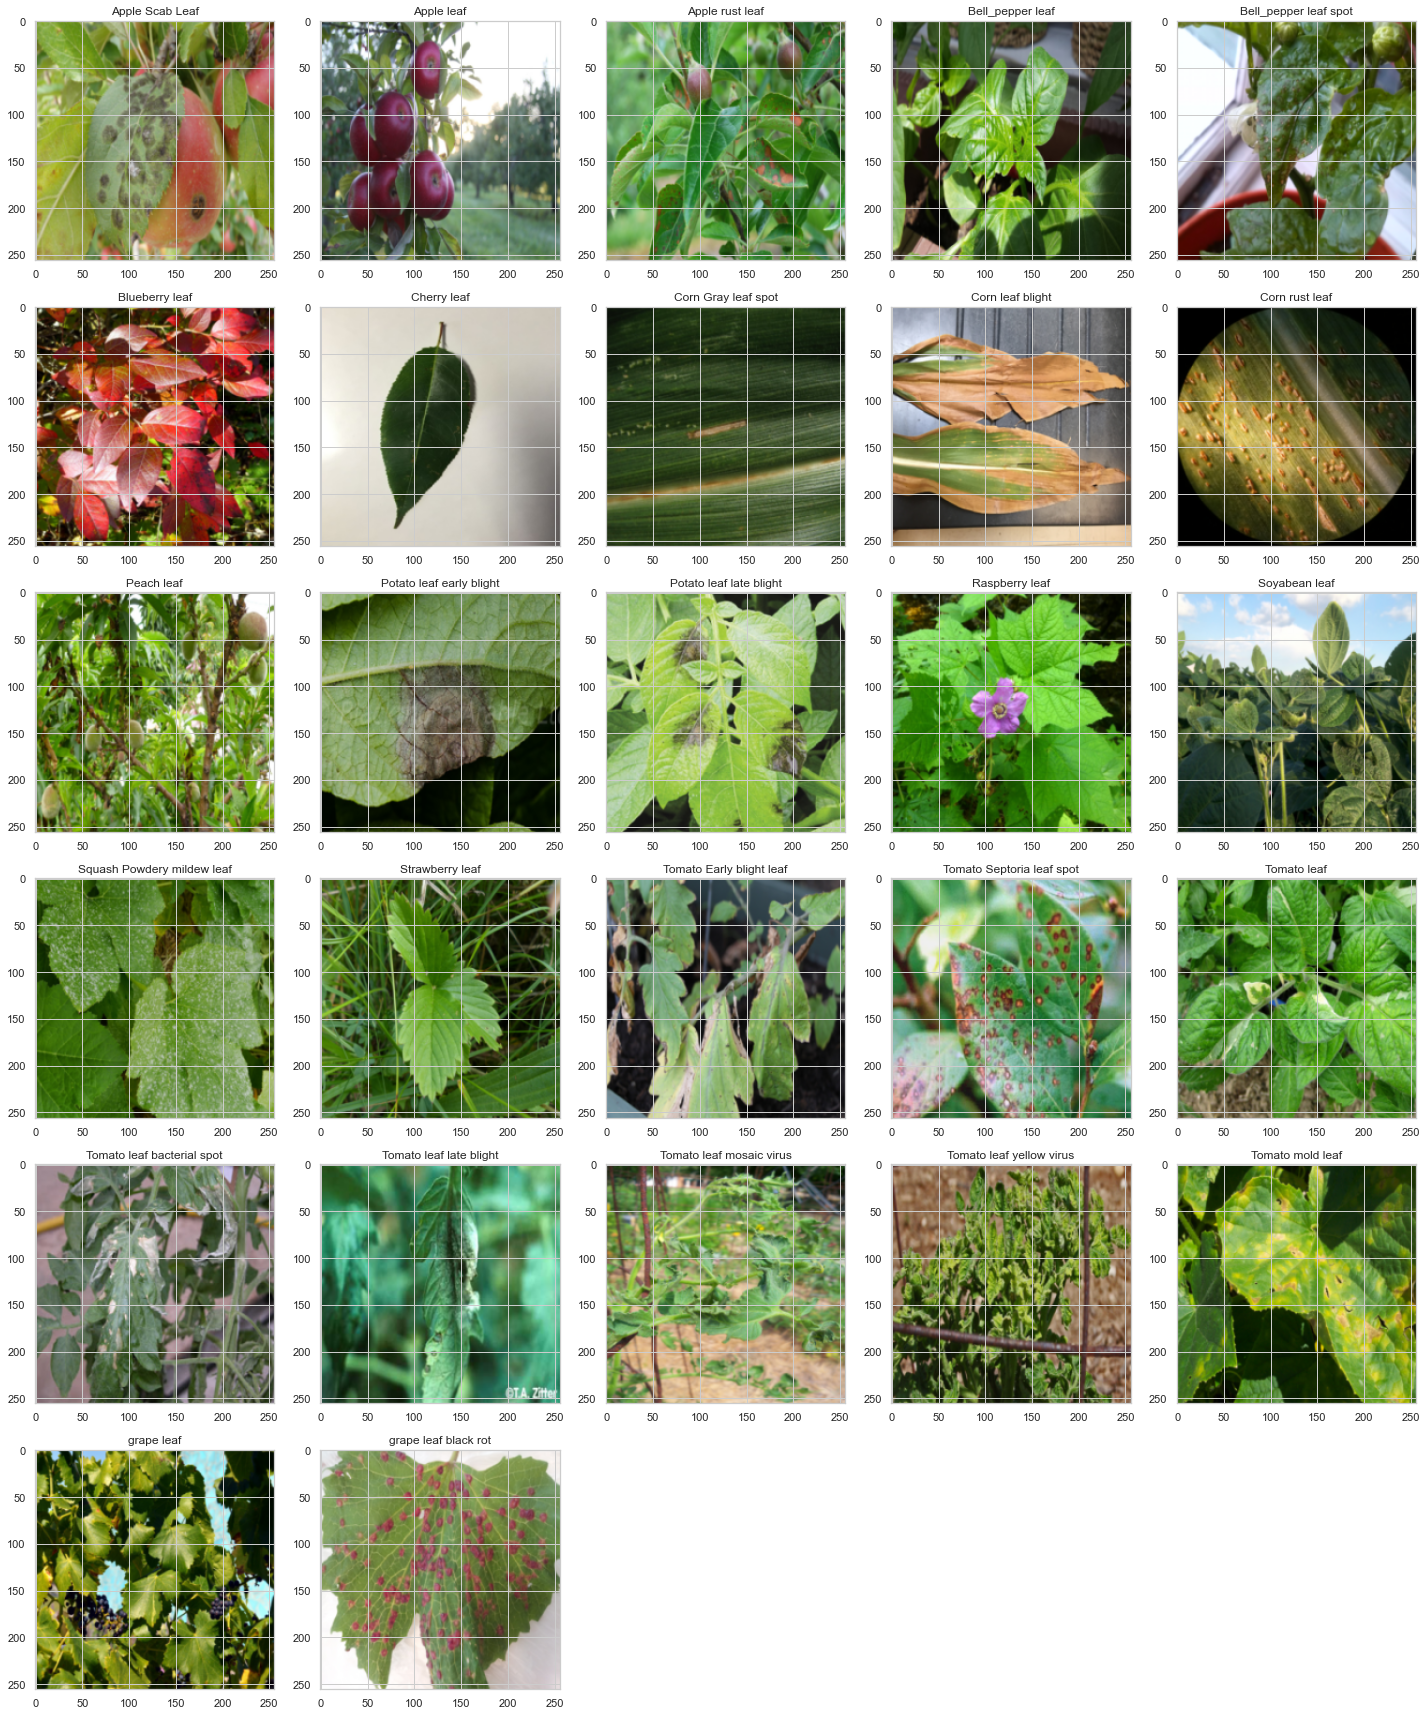

In [9]:
import cv2
def find_first_images_per_class(dataset):
    num_classes = len(dataset.classes)
    first_images = [-1] * num_classes
    for i in range(len(dataset)):
        img, label = dataset[i]
        if first_images[label] == -1:
            first_images[label] = i
        if all(index != -1 for index in first_images):
            break
    return first_images

def plot_sample_images(image_indices, dataset_classes, image_dataset):
    num_images = len(image_indices)
    num_cols = 5
    num_rows = int(np.ceil(num_images / num_cols))
    
    plt.figure(figsize=(4 * num_cols, 4 * num_rows))
    for i, index in enumerate(image_indices):
        img, label = image_dataset[index]
        img = img.permute(1, 2, 0).numpy()
        
        # ปรับขนาดภาพให้เป็น 256x256 ด้วย OpenCV
        resized_image = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
        
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(resized_image)
        plt.title(dataset_classes[label])
        
        # เพิ่มตัวเลขแกน x และ y
        plt.xticks(range(0, 256, 50))
        plt.yticks(range(0, 256, 50))
    plt.tight_layout()
    plt.show()

first_images = find_first_images_per_class(image_dataset)
plot_sample_images(first_images, image_dataset.classes, image_dataset)

In [10]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [46]:
ROOT_DIR_TEST = "test"
# Test transforms
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Prepare the Datasets
Test_dataset = datasets.ImageFolder(root=ROOT_DIR_TEST, transform=train_transform)

# Prepare the Data Loaders
Test_loader = DataLoader(Test_dataset, batch_size=1, shuffle=True, num_workers=4)

In [47]:
num_images = len(Test_dataset)
num_classes = len(Test_dataset.classes)
print(f"Number of Images: {num_images}")
print(f"Number of Classes: {num_classes}")

Number of Images: 236
Number of Classes: 27
